# Домашнее задание

## Вариант 1

1. Анохин Георгий Александрович
2. Георгиев Денис Дмитриевич 
3. Горячев Иван Сергеевич
4. Даниярбек уулу Нурбол

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Vmag` и `e_Plx`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `TargetClass`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var1.csv**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/class_work_6/train.csv')
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,G5V,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,G2Ib,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,F5V,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,K2III,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,K5III,16.379680,0


Text(0, 0.5, 'e_Plx')

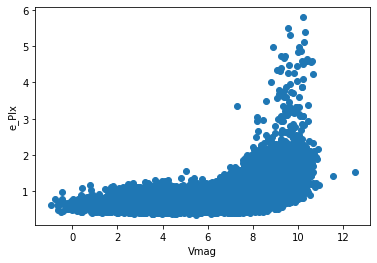

In [5]:
plt.scatter(df['Vmag'], df['e_Plx'])
plt.xlabel("Vmag")        
plt.ylabel("e_Plx")
# вывод для Vmag < 8 e_Plx почти одинаковый, для Vmag > 8 наблюдается значительное число выбросов

In [6]:
df.isna().sum()
# так тут же нет пропусков, зачем строить то...
# вывод пропусков нет

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

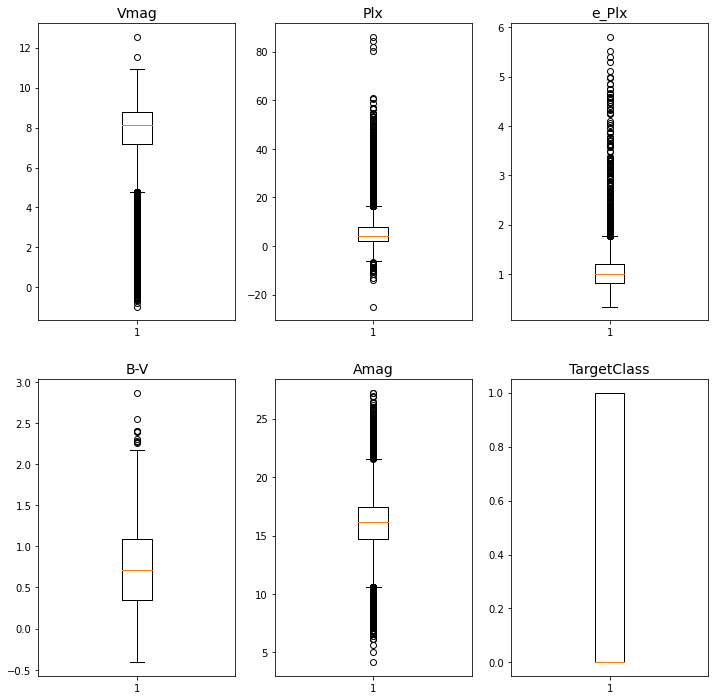

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12,12))
c = 0
for key in df.keys():
  i = c//3
  j = c%3
  if df[key].dtype == np.int64 or df[key].dtype == np.float64:
    axes[i][j].boxplot(df[key])
    c+=1
    axes[i][j].set_title(key, fontsize=14)

Text(0.5, 1.0, 'Распределение классов')

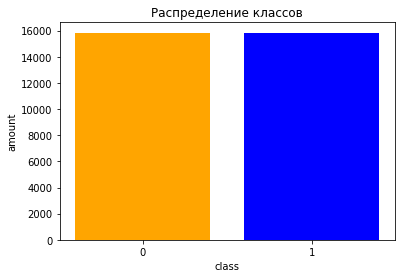

In [27]:
vc = df['TargetClass'].value_counts()
plt.xlabel('class')
plt.ylabel('amount')
plt.bar(x=['0', '1'], height=vc, color=['orange', 'b'])
plt.title('Распределение классов')
# вывод классов поровну

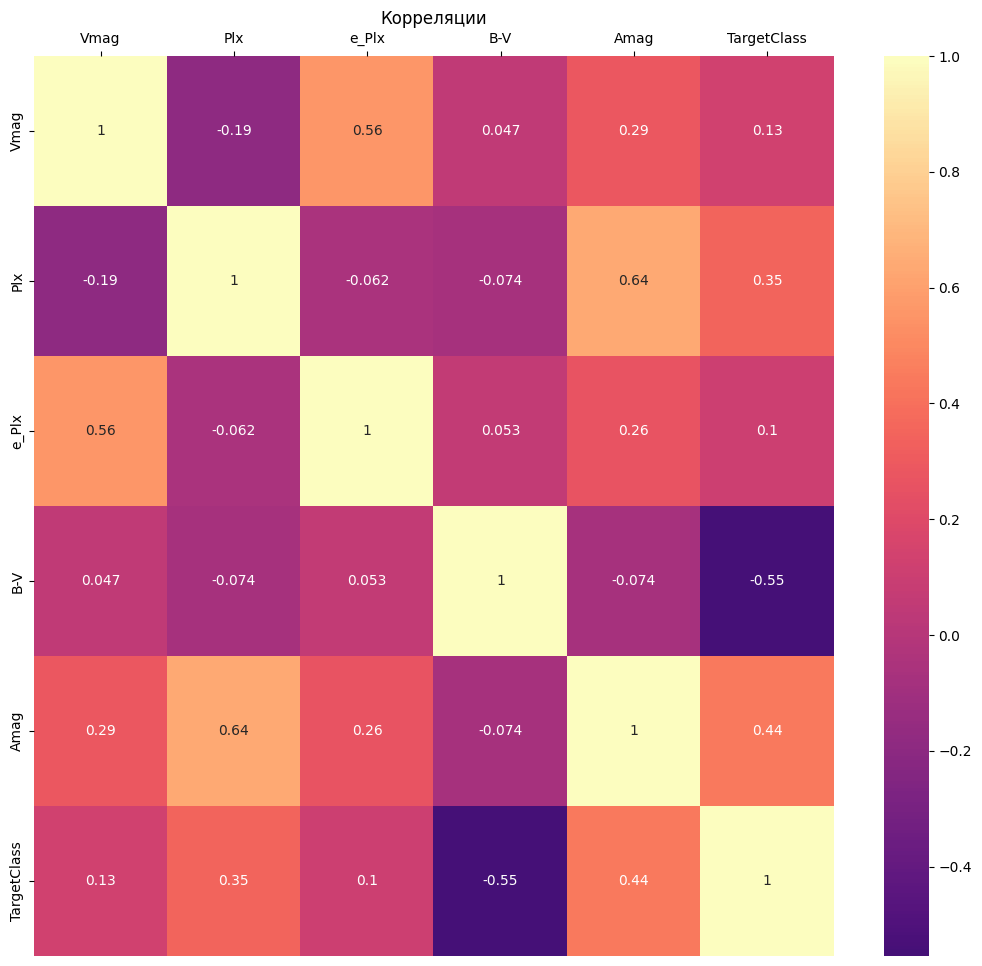

In [35]:
import seaborn as sns
fig = plt.figure(figsize=(10, 9), dpi=100)
axes = fig.add_axes([1,1,1,1])
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='magma', center=0, annot=True, )
axes.xaxis.tick_top()
plt.title('Корреляции')
plt.show()

<Figure size 1000x800 with 0 Axes>

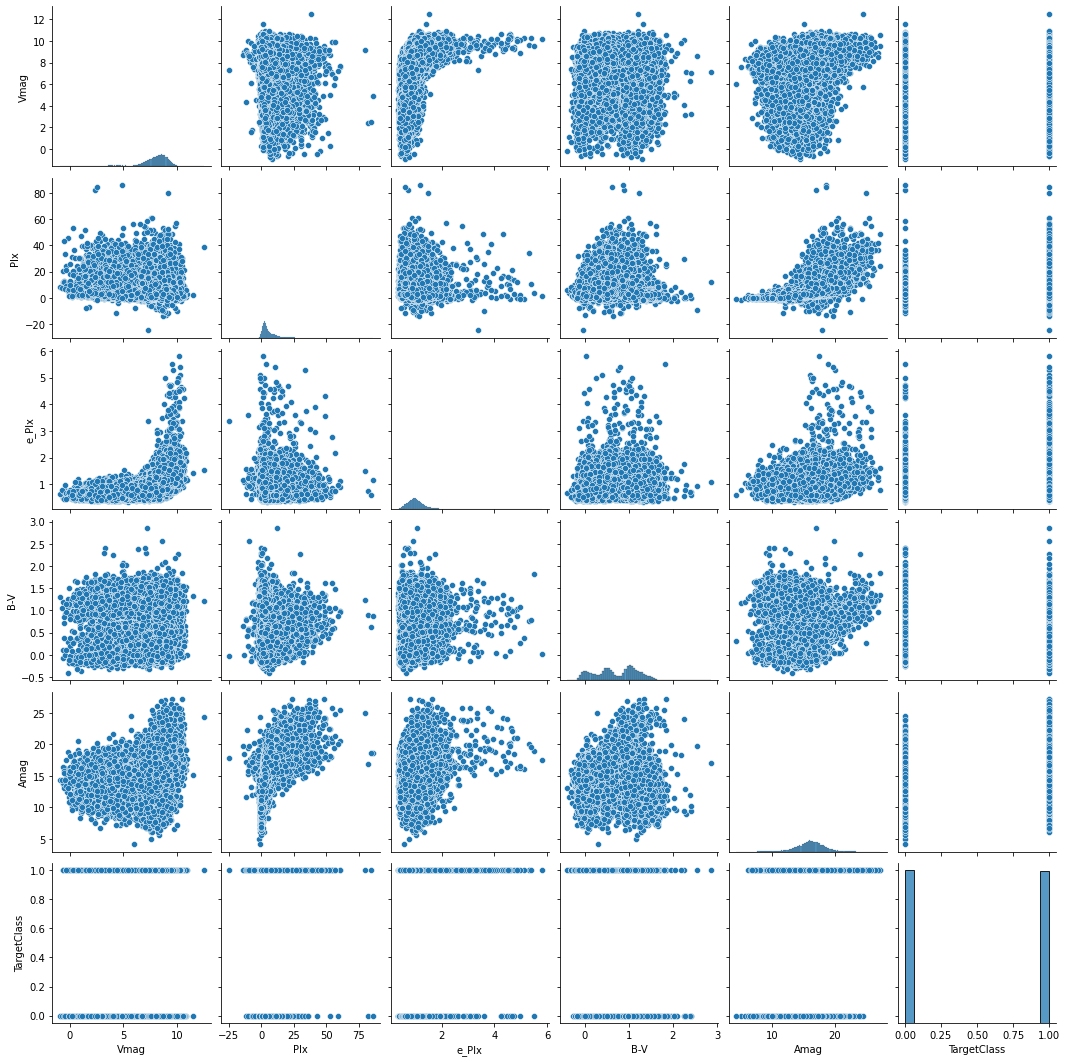

In [26]:


plt.figure(figsize=(10,8), dpi= 130)
sns.pairplot(df)
plt.show()